In [ ]:
%matplotlib notebook

In [ ]:
#get data from police csv
#import dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [ ]:
#link to the csv
police_data = pd.read_csv("../Resources/Police_csv.csv")
police_data.head()

In [ ]:
#Rename first column to date and remove Entire Period row
police_data.dtypes

In [ ]:
police_data = police_data.rename(columns= {"Unnamed: 0":"Date", "DUIcrashes/2020":"DUI crashes 2020", "DUIcrashes/2019":"DUI crashes 2019"})
police_data.head(20)

In [ ]:
#Remove asterisk from date '3/16/2020'
police_data['Date'].unique()

In [ ]:
#Remove first summary row from the data set 'Entire Period'
police_data = police_data.loc[police_data['Date'] !="Entire Period"]
police_data.head(20)

In [ ]:
#groupby function to set apart my more important variables
DUI_crashes_df = police_data[["Date", "DUI crashes 2020", "DUI crashes 2019"]].copy()
DUI_crashes_df

In [16]:
#define dtype

In [17]:
# create a list to hold the modify formatted dates
formatted_dates = []

# index start at 1 therefore it must end at lenght + 1
for i in range(1, len(DUI_crashes_df["Date"]) + 1):
    try:
        # year has a format of 4 digits (upper case "Y")
        formatted_dates.append(pd.to_datetime(DUI_crashes_df["Date"][i], format ='%m/%d/%Y'))
    except ValueError: #if it fails year has a format of 2 digits [%y] (lower case "y")
        formatted_dates.append(pd.to_datetime(DUI_crashes_df["Date"][i], format ='%m/%d/%y'))
# avoid a SettingWithCopyWarning error in pandas
# src: https://www.youtube.com/watch?v=4R4WsDJ-KVc
DUI_crashes_df['Date'].loc[:] = formatted_dates
DUI_crashes_df


,Date,DUI crashes 2020,DUI crashes 2019
1,2020-02-03 00:00:00,102,114
2,2020-02-10 00:00:00,120,82
3,2020-02-17 00:00:00,100,88
4,2020-02-24 00:00:00,98,105
5,2020-03-02 00:00:00,110,98
6,2020-03-09 00:00:00,102,124
7,2020-03-16 00:00:00,58,101
8,2020-03-23 00:00:00,71,98
9,2020-03-30 00:00:00,64,96
10,2020-04-06 00:00:00,66,95


In [21]:
#Convert to only month and day
#Month_day = pd.to_datetime(formatted_dates, format = '%m/%d')


<IPython.core.display.Javascript object>


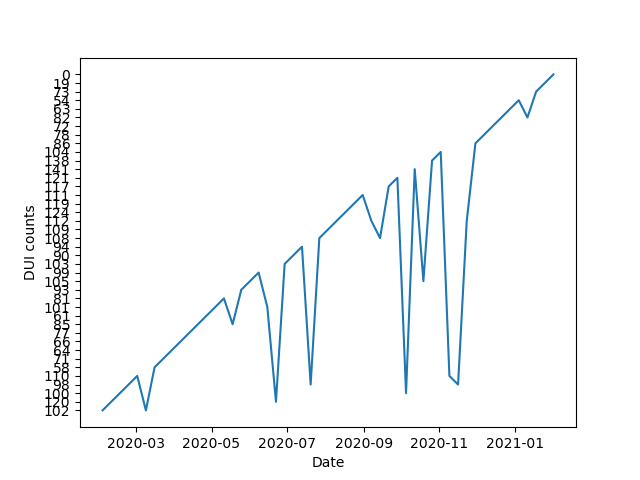

Text(0.5, 0, 'Date')

In [24]:
#plt.hist(DUI_crashes_df['formatted_dates'])
#plt.xlabel('Date')
#plt.ylabel('Counts')
#plt.show()

plt.plot(formatted_dates, DUI_crashes_df['DUI crashes 2020'])
plt.ylabel('DUI counts')
plt.xlabel('Date')


In [ ]:
#make a chart to show correlation
plt.scatter(DUI_crashes_df['Date'], DUI_crashes_df['DUI crashes 2020'], color="red", label= "month")
clb = plt.colorbar()
plt.xlabel("Date")
plt.ylabel("DUI Crashes 2020")
clb.set_label("Drinking")
plt.show()

In [41]:
#sum of values by year
data1 = {'Year': ["DUI crashes 2020", "DUI crashes 2019"],'Crashes': [DUI_crashes_df["DUI crashes 2020"][0], DUI_crashes_df["DUI crashes 2020"][1]]}

KeyError: 0